In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/datasets/CodSoft/Movie genre classification/train_data.txt",
                         sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/datasets/CodSoft/Movie genre classification/test_data.txt",
                         sep=':::', names=['Title', 'Description'], engine='python')

In [ ]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_data.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
test_data.describe()

,Title,Description
count,54200,54200
unique,54200,54072
top,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,1,10


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Title          0
Genre          0
Description    0
dtype: int64

Text(0, 0.5, 'Genre')

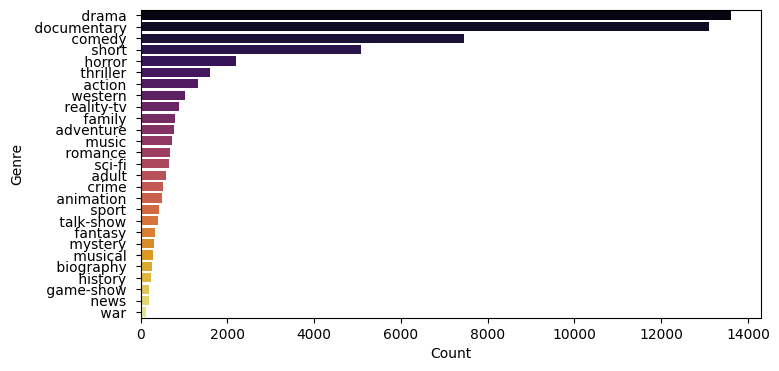

In [ ]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(8, 4))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='inferno')
plt.xlabel('Count')
plt.ylabel('Genre')


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

In [ ]:
#Cleaning Duplicates
train_data = train_data.drop_duplicates(keep='first')

In [ ]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True)

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [ ]:
# Split the data into training and test sets
X = X_train
y = train_data['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Naive Bayes

In [ ]:
# Initialize and train a Multinomial Naive Bayes classifier
myModel = MultinomialNB()
myModel.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = myModel.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.44969104491376927


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       268
       adult        0.00      0.00      0.00       125
   adventure        0.00      0.00      0.00       158
   animation        0.00      0.00      0.00        98
   biography        0.00      0.00      0.00        43
      comedy        0.62      0.03      0.05      1432
       crime        0.00      0.00      0.00        91
 documentary        0.54      0.90      0.67      2640
       drama        0.39      0.88      0.54      2781
      family        0.00      0.00      0.00       138
     fantasy        0.00      0.00      0.00        56
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        52
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       162
     musical        0.00      0.00      0.00        58
     mystery        0.00      0.00      0.00        76
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Make predictions using the trained model on the test data
y_pred = myModel.predict(X_test)
print("y_pred:", y_pred)

y_pred: [' drama ' ' documentary ' ' drama ' ... ' documentary ' ' drama '
 ' documentary ']


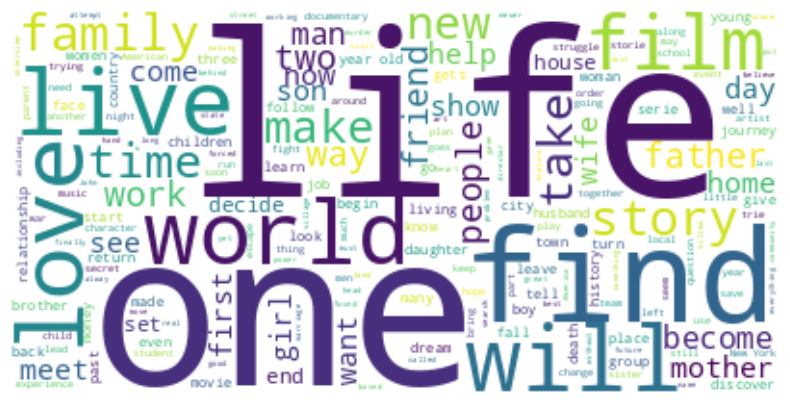

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the text in the description column
text = " ".join(desc for desc in train_data.Description)

# Create wordcloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()